In [1]:
!python -m pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-4iz5f_1e
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-4iz5f_1e
  Resolved https://github.com/huggingface/transformers to commit a06a0d12636756352494b99b5b264ac9955bc735
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
pip install accelerate>=0.12.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor


In [4]:
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", trust_remote_code = True ,torch_dtype="auto", device_map="auto"
)

processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [5]:
from PIL import Image
import requests

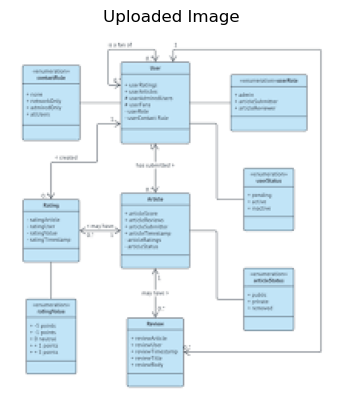

This image is a UML (Unified Modeling Language) class diagram. It represents a set of classes and their relationships within a software system. Here's a breakdown of the elements in the the diagram:

1. **Classes**:
   - `Article`: This class is connected to `Rating` and `Revision` classes.
   - `Rating`: This class is connected to `Article` and `Revision` classes.
   - `Revision`: a class connected to `Article` and `Rating` classes.

2 class is connected to `Article` and `Revision` classes.

2 class is connected to `Article` and `Revision` classes.

2 class is connected to `Article` and `Revision` classes.

2 class is connected to `Article` and `Revision` classes.

2 class is connected to `Article` and `Revision` classes.

2. **Relationships**:
   - `has`: Indicates a one-to-many relationship, where one `Article` can have many `Ratings`.
   - `created`: Indicates a one-to-one relationship, where one `Rating` is created by one `Article`.
   - `is connected to`: Indicates a one-to-many 

In [8]:


from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the image
image = Image.open("11.png")
plt.imshow(image)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# Define the messages list
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": " what is shown in this image"},
        ],
    }
]

# Process the text prompt
text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

# Prepare the input with padding and tensors
inputs = processor(
    text=[text_prompt],
    images=[image],
    padding=True,
    return_tensors="pt",
)

# Set device for inputs only (skip model.to(device) since accelerate handles model device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = inputs.to(device)

# Generate output
output_ids = model.generate(**inputs, max_new_tokens=1024)

# Trim the generated tokens to exclude the prompt
generated_ids = [out[len(in_ids):] for in_ids, out in zip(inputs.input_ids, output_ids)]

# Decode the output text
output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)

print("\n".join(output_text))



